<a href="https://colab.research.google.com/github/RGologorsky/fastai/blob/master/RGologorsky_Dinosaur_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In [0]:
from fastai.vision import *
import pandas as pd

## Get a list of URLs

### Search and scroll

### Download into file



In Google Chrome press <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, 

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [0]:
classes = ['Tyrannosaurus_Rex','Velociraptor','Brachiosaurus', 'Stegosaurus']

In [0]:
root_dir = Path("/content/gdrive/My Drive/")
data_dir = root_dir/'data'

In [0]:
dino_dir = data_dir/"dinosaurs"

In [0]:
dino_dir.ls()

[PosixPath('/content/gdrive/My Drive/data/dinosaurs/Stegosaurus'),
 PosixPath('/content/gdrive/My Drive/data/dinosaurs/Tyrannosaurus_Rex'),
 PosixPath('/content/gdrive/My Drive/data/dinosaurs/Velociraptor'),
 PosixPath('/content/gdrive/My Drive/data/dinosaurs/Brachiosaurus'),
 PosixPath('/content/gdrive/My Drive/data/dinosaurs/urls_Tyrannosaurus_Rex.csv'),
 PosixPath('/content/gdrive/My Drive/data/dinosaurs/urls_Velociraptor.csv'),
 PosixPath('/content/gdrive/My Drive/data/dinosaurs/urls_Brachiosaurus.csv'),
 PosixPath('/content/gdrive/My Drive/data/dinosaurs/urls_Stegosaurus.csv')]

## Download images

In [0]:
for c in classes:
  file = f"urls_{c}.csv"
  dest = dino_dir/c
  download_images(dino_dir/file, dest, max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(dino_dir/c, delete=True, max_size=500)

Tyrannosaurus_Rex


Velociraptor


Brachiosaurus


Stegosaurus


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(dino_dir, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Brachiosaurus', 'Stegosaurus', 'Tyrannosaurus_Rex', 'Velociraptor']

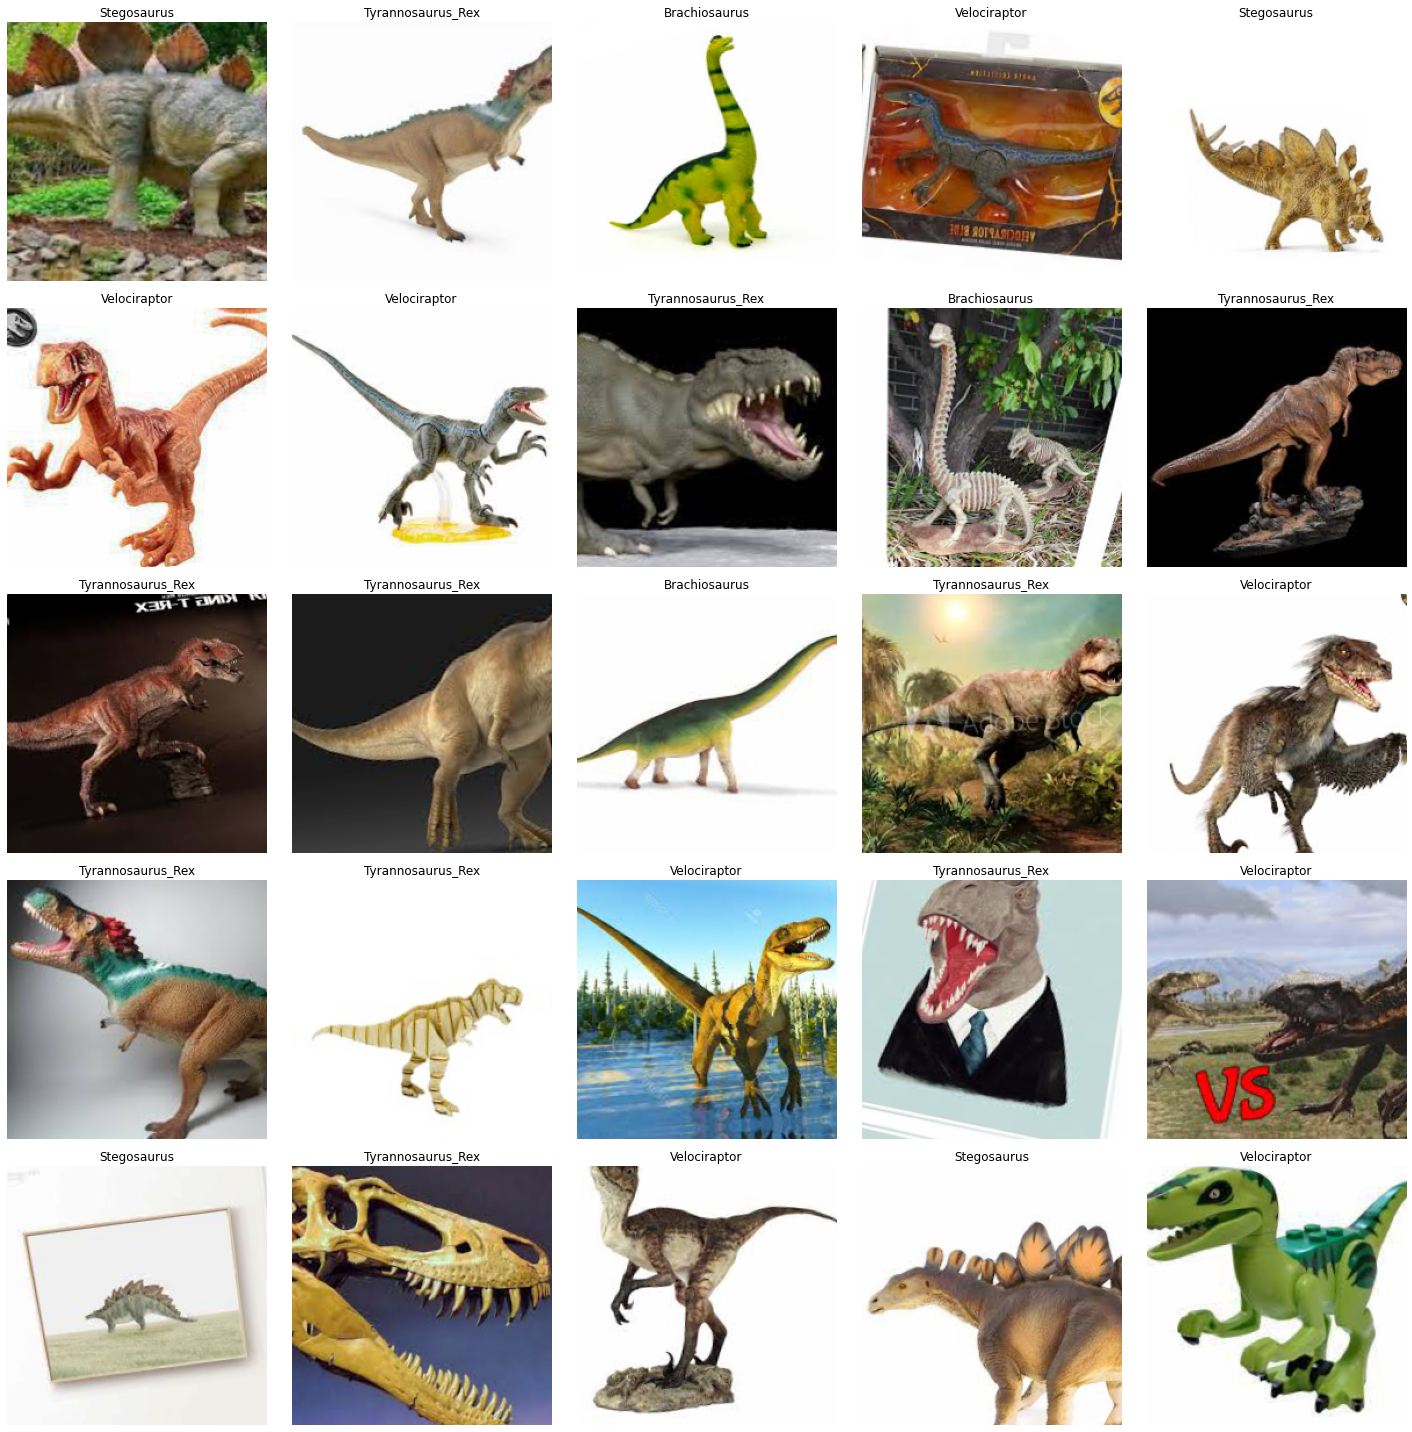

In [0]:
data.show_batch(rows=5)

# train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.254593,1.699893,0.547619,00:06
1,1.660364,1.473284,0.369048,00:05
2,1.261935,1.191498,0.321429,00:05
3,1.038695,1.081363,0.297619,00:04


In [0]:
learn.save("stage-1")

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


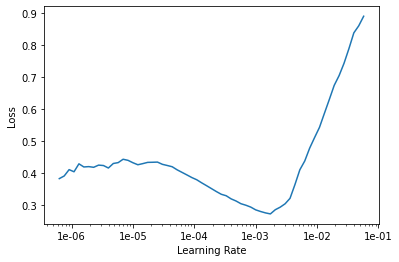

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(5e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.446901,0.992901,0.273810,00:05
1,0.375992,0.879012,0.226190,00:05


In [0]:
learn.save('stage-2')

## interp

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

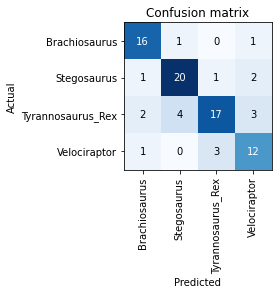

In [0]:
interp.plot_confusion_matrix()

## cleaning up 

In [0]:
from fastai.widgets import *